In [1]:
# Pandas is the main library used for exploratory data analysis
# Pandas is built on top of numpy 
# Numpy allows fast advanced mathematical operations on large amount of data
import numpy as np
import pandas as pd

# Library to assign missing values - not used here, better do it in EDA
from sklearn.impute import SimpleImputer

# Matplotlib is the main plotting library for python
# Seaborn is built on top of matplotlib and it's easier to use
# pandas also have same basic plotting capabilities which are again built on top of matplotlib
import matplotlib.pyplot as plt
# The next statement instructs matplotlib to plot the graphs inside the notebook
%matplotlib inline 
import seaborn as sns

# Another useful plotting library is plotly - it is used for interactive plots
# Library for pickling
import joblib

# Library needed for counting categorical values
import collections

# Library for splitting the data into train and test sets
from sklearn.model_selection import train_test_split 

# Model library
from sklearn.linear_model import LogisticRegression

# Scaling
from sklearn.preprocessing import StandardScaler

# label encoder
from sklearn.preprocessing import LabelEncoder

# Onehot encoding
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import numpy as np

# Metrics library
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Libary needed for resampling data
from sklearn.utils import resample


In [2]:
# Load the data - assuming its stored on your computer
# Load the pickled file
personalLoan_df = joblib.load('personalLoan-cleaned.pkl')  

# Check
personalLoan_df.head()

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3,43.0,33.0,1.0,0,54.0,0,0,0.0,0,0,1,0
1,8,60.0,12.0,3.0,1,121.0,125,1,2.1,1,0,1,1
2,10,63.0,13.0,4.0,1,30.0,98,0,0.0,0,1,1,0
3,11,35.0,12.0,1.0,0,121.0,0,0,0.0,0,0,0,0
4,12,37.0,29.0,3.0,1,47.0,0,1,0.9,1,0,1,0


In [3]:
# What is the data type?
#type(diabetes_df)
# or
print(type(personalLoan_df))

<class 'pandas.core.frame.DataFrame'>


In [4]:
personalLoan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786 entries, 0 to 3785
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         3786 non-null   int64  
 1   age                 3786 non-null   float64
 2   yrs_experience      3786 non-null   float64
 3   family_size         3786 non-null   float64
 4   education_level     3786 non-null   int64  
 5   income              3786 non-null   float64
 6   mortgage_amt        3786 non-null   int64  
 7   credit_card_acct    3786 non-null   int64  
 8   credit_card_spend   3786 non-null   float64
 9   share_trading_acct  3786 non-null   int64  
 10  fixed_deposit_acct  3786 non-null   int64  
 11  online_acct         3786 non-null   int64  
 12  personal_loan       3786 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 384.6 KB


In [5]:
# shape will return as tuple containing the number of rows and columns
#personalLoan_df.shape
#personalLoan_df.shape[0]
#personalLoan_df.shape[1]

# Note: the result of a line of code is automatically printed below the cell
# However, if there are more than one statements, then one of them will print its results
# And only the result of the last statement is visible
# But if you can override this behaviour by using print statements as shown below
print(personalLoan_df.shape)
print(personalLoan_df.shape[0])
print(personalLoan_df.shape[1])

(3786, 13)
3786
13


In [6]:
# By default, head() will display 5 rows
personalLoan_df.head()
# If you want to see more rows, pass the number as a parameter to the function
#personalLoan_df.head(10)

# Note: You can also use Excel to view the CSV file

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3,43.0,33.0,1.0,0,54.0,0,0,0.0,0,0,1,0
1,8,60.0,12.0,3.0,1,121.0,125,1,2.1,1,0,1,1
2,10,63.0,13.0,4.0,1,30.0,98,0,0.0,0,1,1,0
3,11,35.0,12.0,1.0,0,121.0,0,0,0.0,0,0,0,0
4,12,37.0,29.0,3.0,1,47.0,0,1,0.9,1,0,1,0


In [7]:
# Print the number of rows and columns (as done before)
# We are here using the python3 f-string which is a lot easier to use
# The format is f""
# Inside the single or double quotation marks, you can have any combination of strings and variables
# Variables are enclosed within curly brackets {}
# The f-string dosumentation can be found at https://www.python.org/dev/peps/pep-0498/
print(f"Rows     : {personalLoan_df.shape[0]}")
print(f"Columns  : {personalLoan_df.shape[1]}" ,)
print()

# Print the column names
print(f"Features : {personalLoan_df.columns.tolist()}")
print()

# Print the total number of null values in the data
# Null values are - NaN (not a number), or blank spaces
# 0 is not a null value - it's a valid value
print(f"Missing values :  {personalLoan_df.isnull().sum().values.sum()}")

# For each column, print the number of unique values
# 2 unique values in column - binary categorical variable e.g. male/female, yes/no, etc
# less than 6 values in columns - still a categorical value but with more than 2 classes
# large number of values - continuous variable
print(f"Unique values :  {personalLoan_df.nunique()}")

Rows     : 3786
Columns  : 13

Features : ['customer_id', 'age', 'yrs_experience', 'family_size', 'education_level', 'income', 'mortgage_amt', 'credit_card_acct', 'credit_card_spend', 'share_trading_acct', 'fixed_deposit_acct', 'online_acct', 'personal_loan']

Missing values :  0
Unique values :  customer_id           3786
age                     45
yrs_experience          43
family_size              5
education_level          3
income                 195
mortgage_amt           269
credit_card_acct         2
credit_card_spend       81
share_trading_acct       2
fixed_deposit_acct       2
online_acct              2
personal_loan            2
dtype: int64


In [8]:
#diabetes_df.describe()
personalLoan_df.describe().T # T means transpose rows to columns

,count,mean,std,min,25%,50%,75%,max
customer_id,3786.0,3015.760169,1724.904216,3.0,1522.25,3029.0,4494.75,6000.0
age,3786.0,45.188325,12.071766,23.0,35.00,46.0,55.00,67.0
yrs_experience,3786.0,20.631537,11.895283,0.0,11.00,21.0,30.00,42.0
family_size,3786.0,2.413365,1.123084,1.0,1.00,2.0,3.00,6.0
education_level,3786.0,1.101690,0.837662,0.0,0.00,1.0,2.00,2.0
income,3786.0,85.130745,42.390561,8.0,55.00,82.0,111.00,202.0
mortgage_amt,3786.0,69.246434,88.606701,0.0,0.00,0.0,126.00,572.0
credit_card_acct,3786.0,0.298996,0.457879,0.0,0.00,0.0,1.00,1.0
credit_card_spend,3786.0,0.631643,1.430176,0.0,0.00,0.0,0.40,9.0
share_trading_acct,3786.0,0.096936,0.295910,0.0,0.00,0.0,0.00,1.0


In [9]:
personalLoan_df.dtypes


customer_id             int64
age                   float64
yrs_experience        float64
family_size           float64
education_level         int64
income                float64
mortgage_amt            int64
credit_card_acct        int64
credit_card_spend     float64
share_trading_acct      int64
fixed_deposit_acct      int64
online_acct             int64
personal_loan           int64
dtype: object

In [10]:
# 1. Use the corr() function from the dataframe to compute the correlations and display as text
corr = personalLoan_df.corr()
print(type(corr))
print(corr)

<class 'pandas.core.frame.DataFrame'>
                    customer_id       age  yrs_experience  family_size   
customer_id            1.000000  0.009670        0.029538    -0.011900  \
age                    0.009670  1.000000       -0.006332    -0.009505   
yrs_experience         0.029538 -0.006332        1.000000    -0.015452   
family_size           -0.011900 -0.009505       -0.015452     1.000000   
education_level       -0.019929 -0.018668        0.030754     0.008665   
income                -0.002618  0.000572       -0.029837     0.071197   
mortgage_amt           0.014034 -0.035119       -0.023171     0.025087   
credit_card_acct      -0.018131 -0.003402       -0.017894     0.019046   
credit_card_spend     -0.000200  0.007592       -0.022929     0.025755   
share_trading_acct     0.000402 -0.013987       -0.005763     0.008979   
fixed_deposit_acct     0.010198  0.005716        0.001476     0.043629   
online_acct            0.002847  0.025748       -0.022098     0.025030   


In [11]:
personalLoan_df.head(1000)

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3,43.0,33.0,1.0,0,54.0,0,0,0.0,0,0,1,0
1,8,60.0,12.0,3.0,1,121.0,125,1,2.1,1,0,1,1
2,10,63.0,13.0,4.0,1,30.0,98,0,0.0,0,1,1,0
3,11,35.0,12.0,1.0,0,121.0,0,0,0.0,0,0,0,0
4,12,37.0,29.0,3.0,1,47.0,0,1,0.9,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1594,56.0,5.0,2.0,0,53.0,0,0,0.0,0,1,0,0
996,1595,46.0,21.0,2.0,1,82.0,89,0,0.0,0,0,1,0
997,1596,52.0,35.0,2.0,0,122.0,0,1,1.8,0,0,0,0
998,1597,41.0,40.0,1.0,2,111.0,180,1,2.7,0,0,0,1


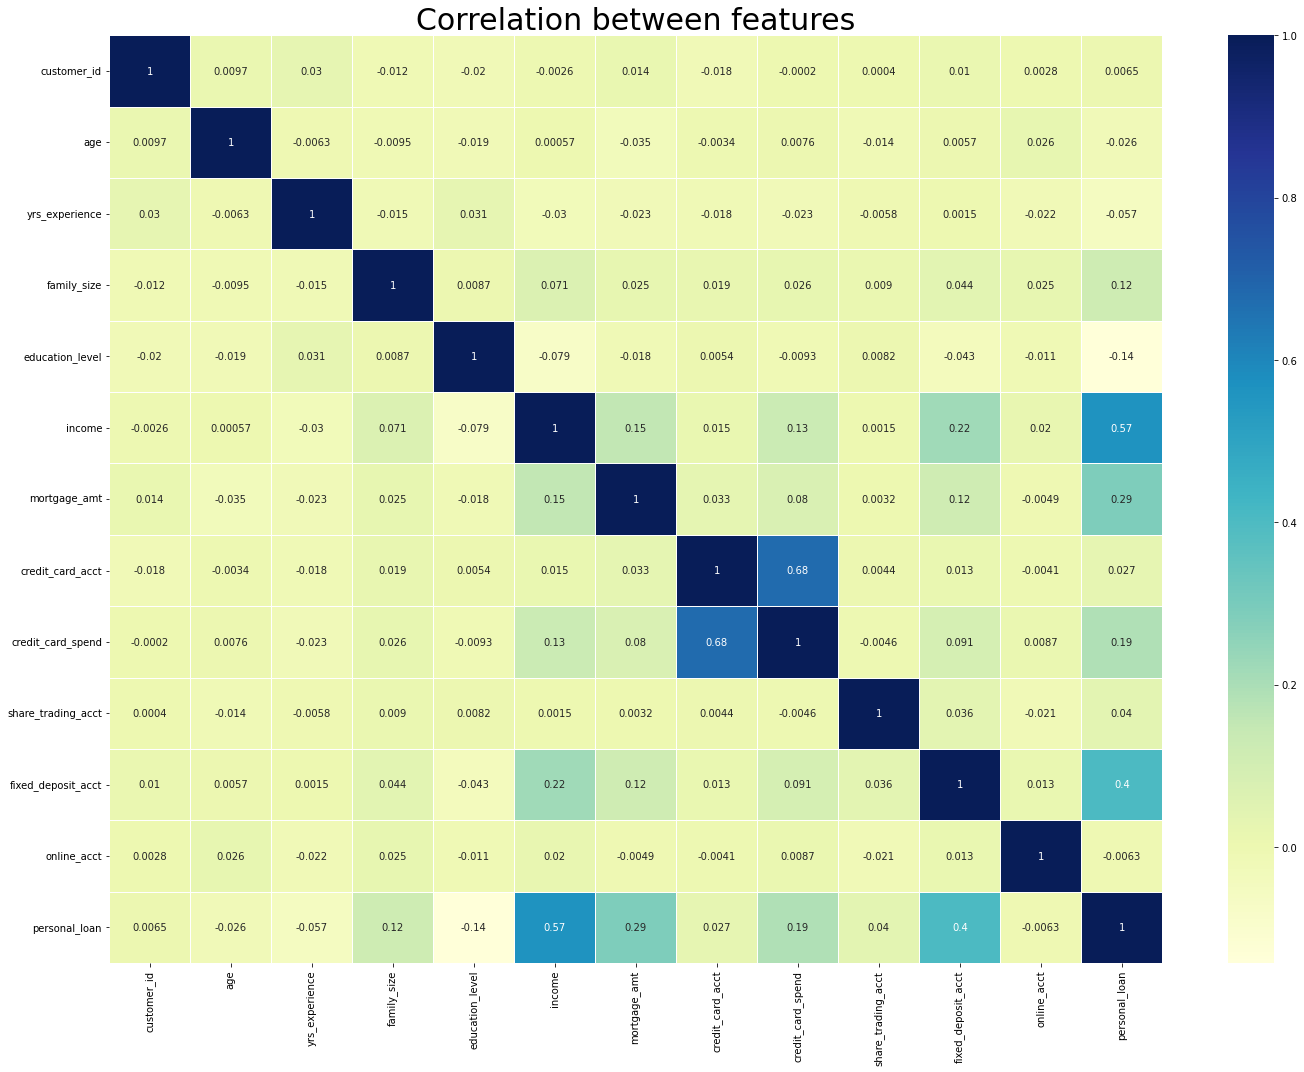

In [12]:
# 3. Using seaborn to plot the correlations as a heatmap
# Ref: https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.rcParams['figure.figsize'] = (20, 15) #figsize(width, height) inches, default(6.4, 4.8), customise as required
sns.heatmap(personalLoan_df.corr(), annot = True, linewidths=.5, cmap="YlGnBu") # YellowGreenBlue
plt.title('Correlation between features', fontsize = 30)
#plt.show() # Do not use this if you want to save to file

# If you want to save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('correlation-heatmap-rectangular.png', dpi=300) # dpi=300 is print quality

# The colours show the strength of the correlations - from yellow (weak) to dark blue (strong)

# Cells on the diagonal are dark blue (corr=1) - correlation of the variable with itself

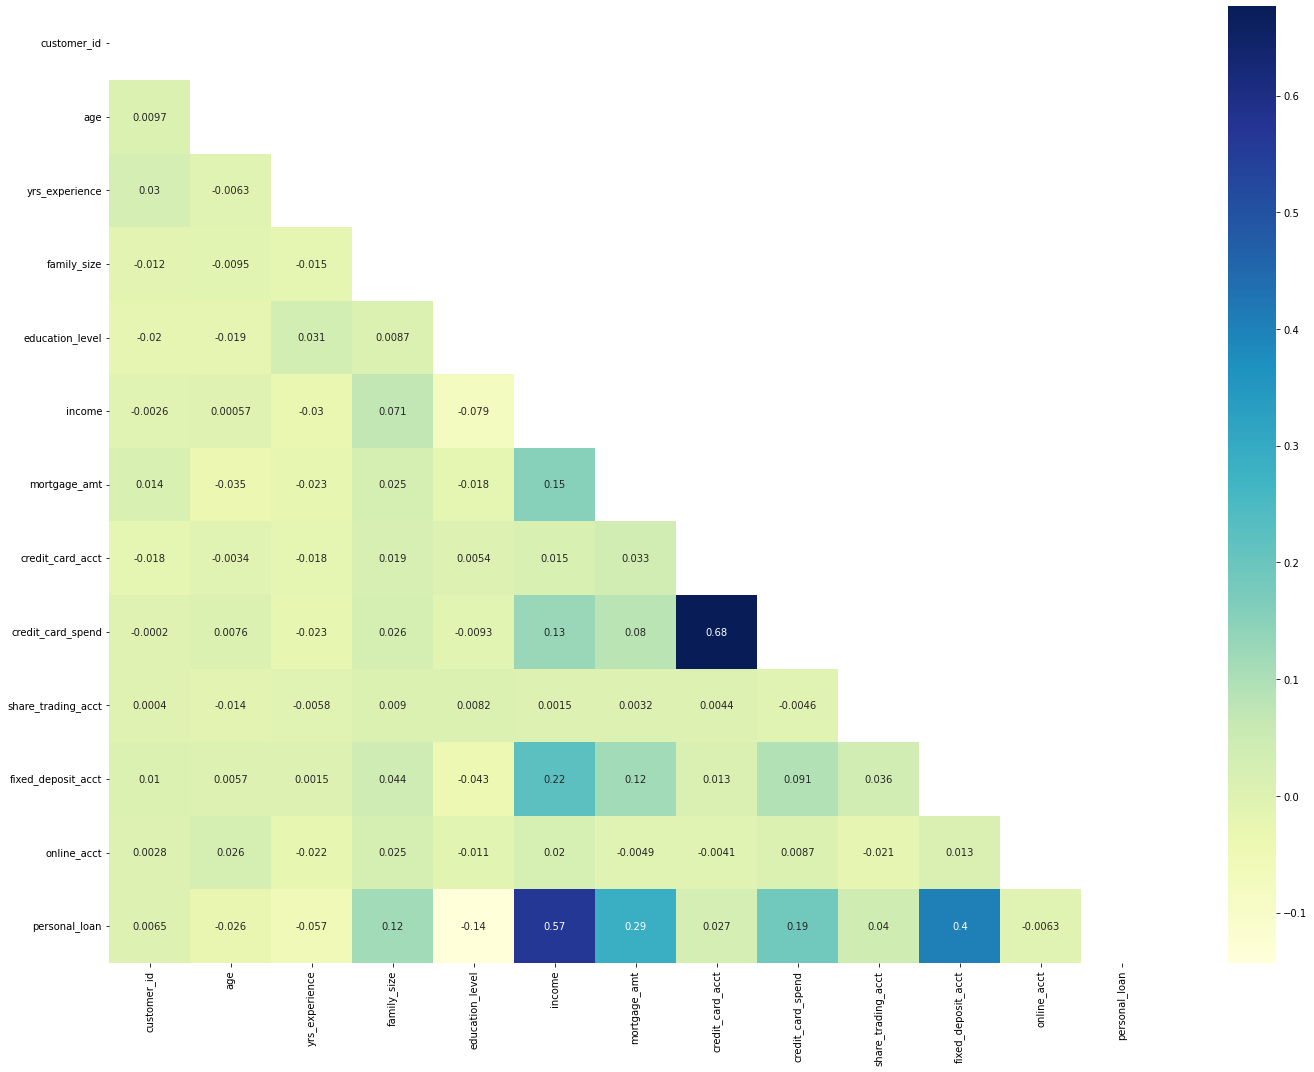

In [13]:
# Changing the shape of the matrix from rectangular to triangular
# https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07
matrix = np.triu(personalLoan_df.corr())
sns.heatmap(personalLoan_df.corr(), annot=True, mask=matrix,  cmap="YlGnBu")

# If you want to save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('correlation-heatmap-traingular.png', dpi=300) # dpi=300 is print quality

labels: ['Yes', 'No']
values: [2654, 1132]


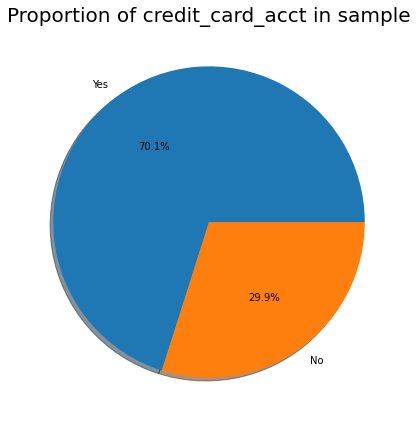

In [14]:
# Plot a pie chart
# Get the labels from the "outcome" column - use keys() function to get the labels
#labels = personalLoan_df["outcome"].value_counts().keys().tolist() # [0,1] not meaningful
labels = ["Yes", "No"]
print(f"labels: {labels}")

# Get the values from the "outcome" column - use values to get the values
values = personalLoan_df["credit_card_acct"].value_counts().values.tolist()
print(f"values: {values}")

# Use matplotlib to draw a simple pie chart
# Ref: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html
plt.figure(figsize=(6,6)) #figsize(width, height) in inches - default(6.4, 4.8) - customise as required
plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title("Proportion of credit_card_acct in sample", fontsize=20) # use fontsize=20 if title is too small

# If the fonts are too small with the default settings, you can adjust them as required
#plt.rc('font', size=10)        # adjust default text sizes (if required)
#plt.rc('axes', labelsize=10)  # adjust fontsize of labels on x/y axes (if required)
#plt.rc('axes', titlesize=10)  # adjust fontsize of titles on x/y axes (if required)
#plt.rc('xtick', labelsize=10) # adjust fontsize of tick labels on x axis (if required)
#plt.rc('ytick', labelsize=10) # adjust fontsize of tick labels on y axis (if required)
#plt.rc('legend', fontsize=10) # adjust fontsize of legend (if required)
#plt.rc('figure', titlesize=30) # adjust fontsize of legend (if required)

#plt.show() # Do not use this is you want to save to file - the file will be empty

# Save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('proportion-diabetics.png', dpi=300)

In [16]:
#  Advanced or Professional account
Advanced_Professional_acct_personalLoan_df = personalLoan_df[personalLoan_df["education_level"]==0]
Advanced_Professional_acct_personalLoan_df.head()

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3,43.0,33.0,1.0,0,54.0,0,0,0.0,0,0,1,0
3,11,35.0,12.0,1.0,0,121.0,0,0,0.0,0,0,0,0
5,13,66.0,28.0,4.0,0,88.0,249,1,0.7,0,0,1,0
9,19,45.0,31.0,2.0,0,179.0,255,0,0.0,0,1,0,1
11,21,38.0,39.0,2.0,0,47.0,0,0,0.0,0,1,0,0


In [17]:
# Graduate account
Graduate_acct_personalLoan_df = personalLoan_df[personalLoan_df["education_level"]==1]
Graduate_acct_personalLoan_df.head()

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
1,8,60.0,12.0,3.0,1,121.0,125,1,2.1,1,0,1,1
2,10,63.0,13.0,4.0,1,30.0,98,0,0.0,0,1,1,0
4,12,37.0,29.0,3.0,1,47.0,0,1,0.9,1,0,1,0
6,16,26.0,9.0,3.0,1,103.0,0,0,0.0,0,0,1,1
7,17,51.0,14.0,1.0,1,98.0,0,1,1.3,0,0,0,0


In [18]:
# Undergraduate account
Undergraduate_acct_personalLoan_df = personalLoan_df[personalLoan_df["education_level"]==2]
Undergraduate_acct_personalLoan_df.head()

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
12,22,63.0,22.0,4.0,2,56.0,240,1,0.3,0,0,0,0
14,25,47.0,9.0,3.0,2,39.0,0,0,0.0,0,0,0,0
16,27,62.0,7.0,3.0,2,105.0,0,0,0.0,0,0,0,0
17,28,38.0,6.0,2.0,2,70.0,121,0,0.0,0,0,1,0
18,29,47.0,42.0,1.0,2,167.0,130,0,0.0,1,0,1,0


In [19]:
# When checking the number of unique values, the blood pressure column was found to contain 47 values
# This is evidence that it's a continuous variable
# Classification algorithms do not work well with continuous values - too many values
# No need to categorise them. How? Need some domain knowlege
# less than 80 = normal, between 80-89 = high, greater than 89 = very high
# Define a function to classify this
# Pass the whole dataframe as parameter
# And return a category
def income(df): 
    if df["income"] <= 50:
        return "Low Income"
    elif (df["income"] > 50) & (df["income"] <= 80):
        return "Medium_income"
    elif df["income"] > 80:
        return "High_income"

# Use apply() to apply a lambda function for all the rows of the dataframe
# The lambda function calls the previously defined function bp_category()
# To which it passes the diabetes_df as parameter
# And a category is returned and saved in a new column named "blood_pressure_category"
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
# the backslash is a line continuation character - there should be nothing after it, not even a space
personalLoan_df["income_category"] = \
    personalLoan_df.apply(lambda personalLoan_df:income(personalLoan_df), axis = 1) # axis=1 = row-wise
# Check
personalLoan_df.head(20)
# This works as there's a new column named "blood_pressure_category"
# The column "blood_pressure" is no longer needed and hence can be deleted 

# This example has shown how to add a column using apply() and a lambda function
# There are other ways to add columns to a dataframe
# You can google this 
# e.g https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan,income_category
0,3,43.0,33.0,1.0,0,54.0,0,0,0.0,0,0,1,0,Medium_income
1,8,60.0,12.0,3.0,1,121.0,125,1,2.1,1,0,1,1,High_income
2,10,63.0,13.0,4.0,1,30.0,98,0,0.0,0,1,1,0,Low Income
3,11,35.0,12.0,1.0,0,121.0,0,0,0.0,0,0,0,0,High_income
4,12,37.0,29.0,3.0,1,47.0,0,1,0.9,1,0,1,0,Low Income
5,13,66.0,28.0,4.0,0,88.0,249,1,0.7,0,0,1,0,High_income
6,16,26.0,9.0,3.0,1,103.0,0,0,0.0,0,0,1,1,High_income
7,17,51.0,14.0,1.0,1,98.0,0,1,1.3,0,0,0,0,High_income
8,18,27.0,39.0,1.0,1,70.0,0,0,0.0,0,0,1,0,Medium_income
9,19,45.0,31.0,2.0,0,179.0,255,0,0.0,0,1,0,1,High_income


In [20]:
with_cardcredit_acct_df = personalLoan_df[personalLoan_df["credit_card_acct"]==1]
without_cardcredit_acct_df = personalLoan_df[personalLoan_df["credit_card_acct"]==0]

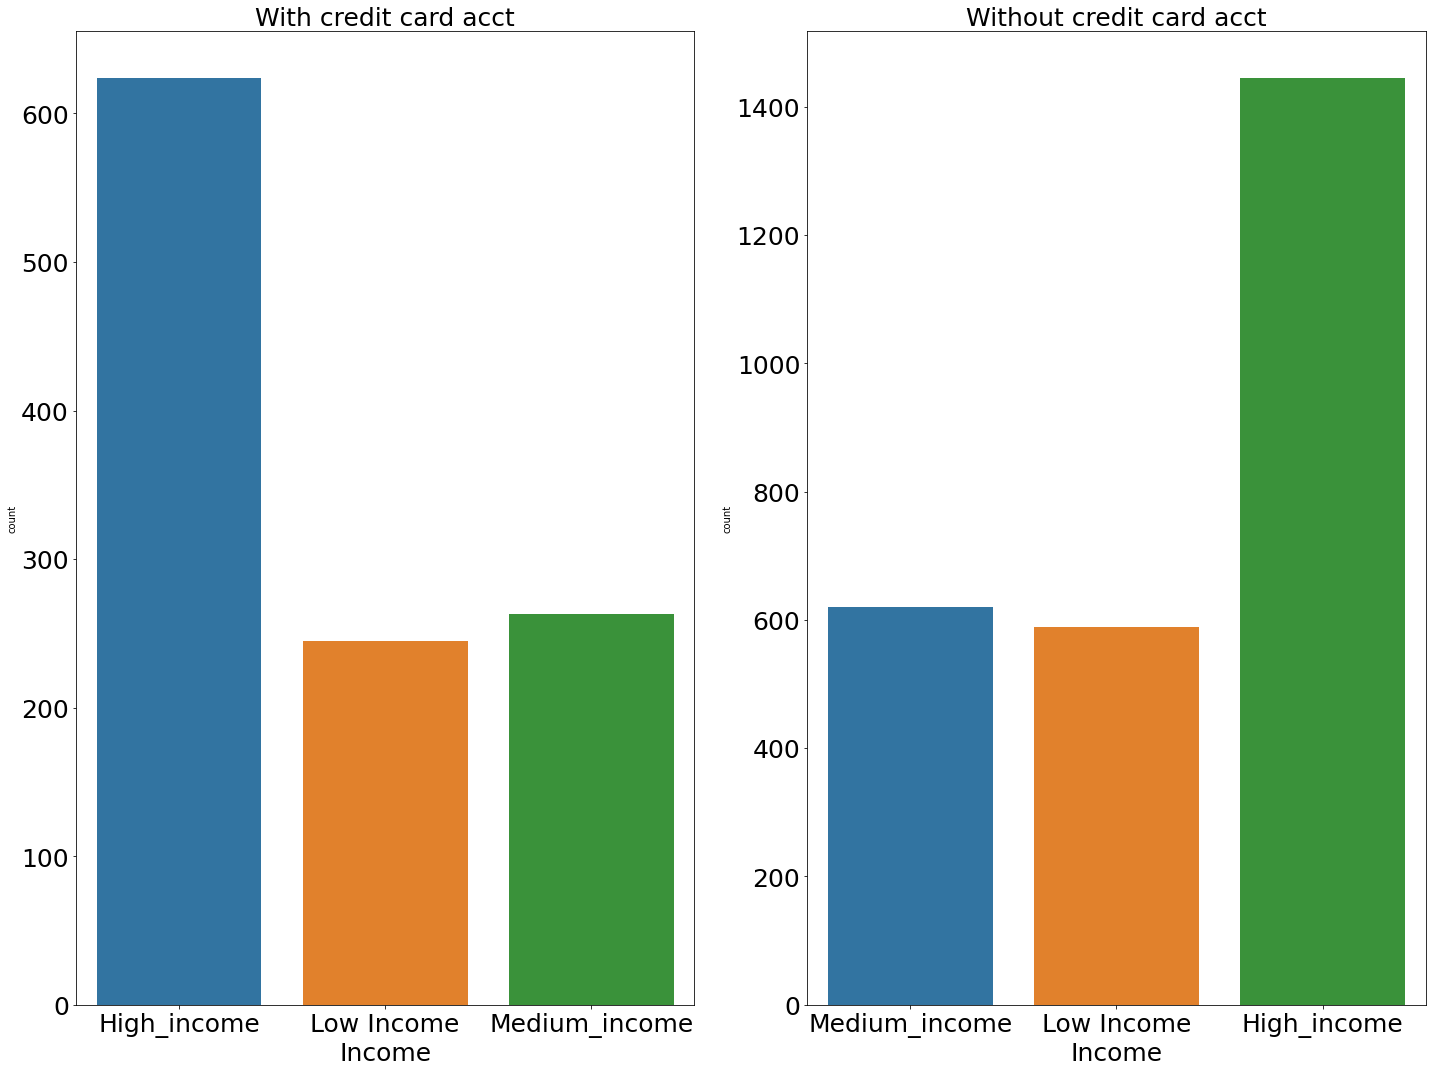

In [21]:
#ASK HOW TO CHANGE THE ORDER

# Plot the charts using Seaborn's countplot()

# AS 2 separate plots side by side
fig, ax = plt.subplots(1,2)
ax1 = sns.countplot(x="income_category", data=with_cardcredit_acct_df, ax=ax[0]) # Non-diabetics dataset
ax2 = sns.countplot(x="income_category", data=without_cardcredit_acct_df, ax=ax[1]) # Diabetics dataset


# If the default labels are too small - adjust them to make them bigger
#ax1.set_title("Healthy") 
#ax1.set_xlabel("Blood Pressure")
#ax2.set_title("Diabetics")
#ax2.set_xlabel("Blood Pressure")
# Adjust the font sizes
ax1.set_title("With credit card acct", fontsize=25)
ax1.set_xlabel("Income", fontsize=25)
ax2.set_title("Without credit card acct", fontsize=25)
ax2.set_xlabel("Income", fontsize=25)
ax1.tick_params(axis='both', which='both', labelsize=25) # x/y axes, minor/major ticks for ax1
ax2.tick_params(axis='both', which='both', labelsize=25) # x/y axes, minor/major ticks for ax2


# If you want to save the graph to disk
plt.tight_layout() # automatically adjusts subplot to fit in the figure area
plt.savefig('income_category-side-by-side.png', dpi=300) # dpi=300 is print quality

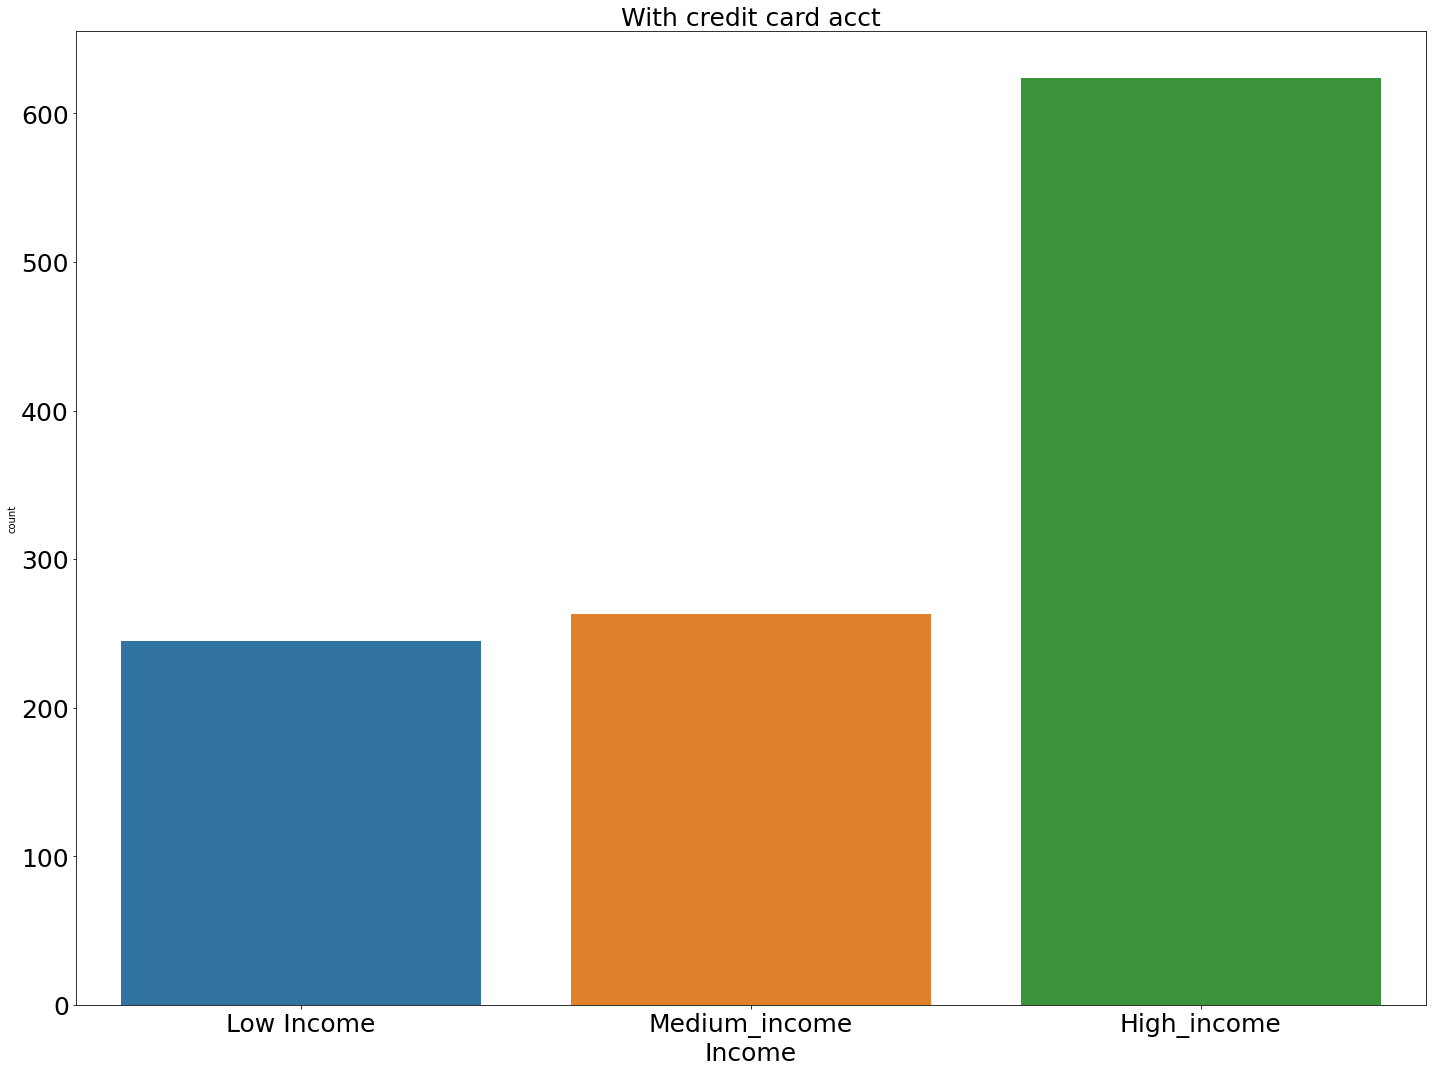

In [22]:
fig, ax = plt.subplots()
ax1 = sns.countplot(data=with_cardcredit_acct_df,x="income_category", order=personalLoan_df['income_category'].value_counts(ascending=True).index)

ax1.set_title("With credit card acct", fontsize=25)
ax1.set_xlabel("Income", fontsize=25)
ax1.tick_params(axis='both', which='both', labelsize=25) # x/y axes, minor/major ticks for ax1

plt.tight_layout() # automatically adjusts subplot to fit in the figure area




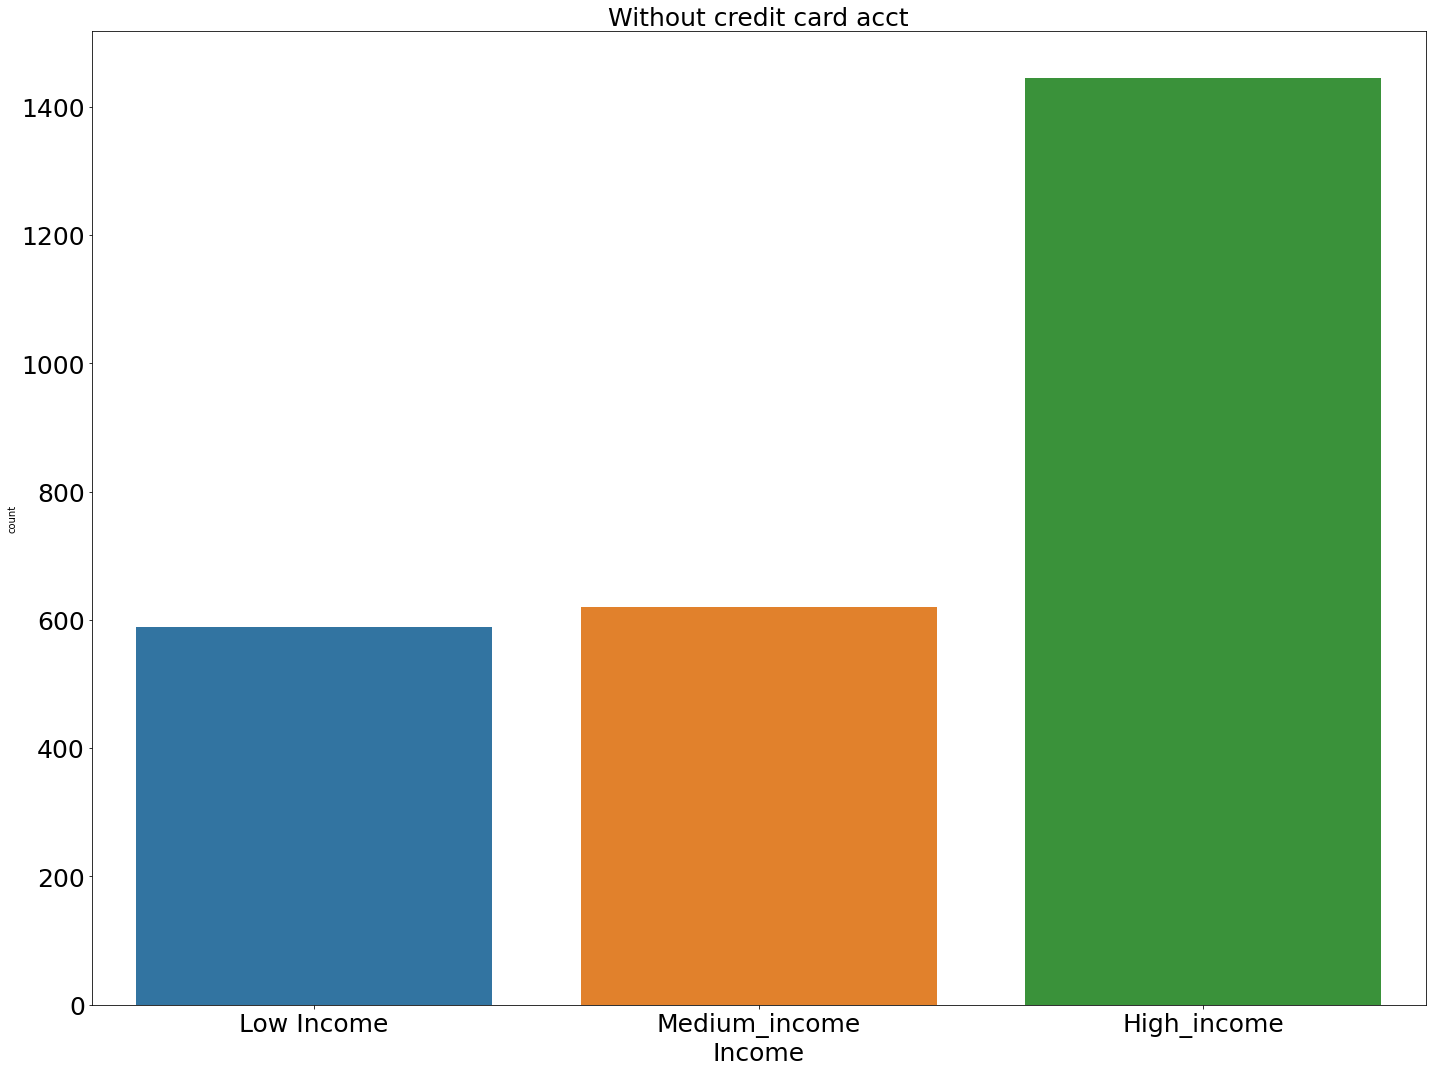

In [23]:
fig, ax = plt.subplots()
ax1 = sns.countplot(data=without_cardcredit_acct_df,x="income_category", order=personalLoan_df['income_category'].value_counts(ascending=True).index)

ax1.set_title("Without credit card acct", fontsize=25)
ax1.set_xlabel("Income", fontsize=25)
ax1.tick_params(axis='both', which='both', labelsize=25) # x/y axes, minor/major ticks for ax1

plt.tight_layout() # automatically adjusts subplot to fit in the figure area

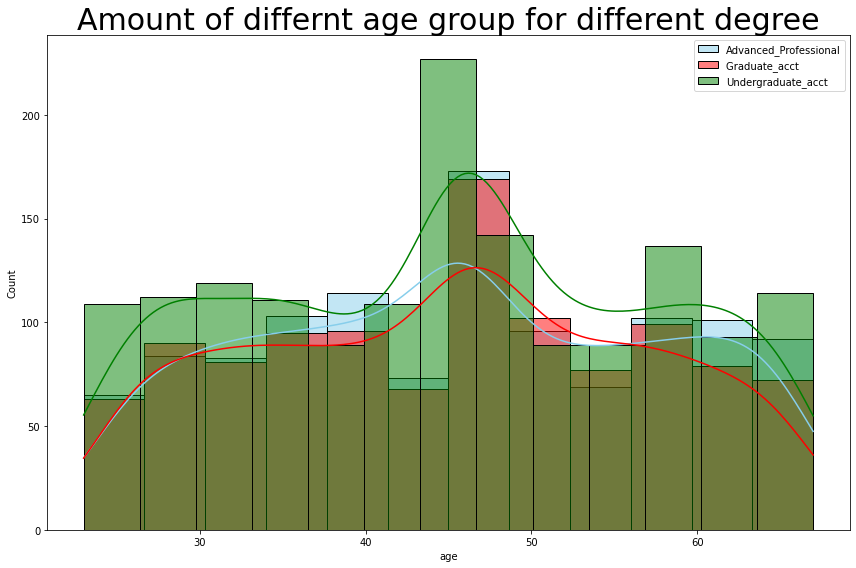

In [25]:
plt.figure(figsize=(12,8))

sns.histplot(data=Advanced_Professional_acct_personalLoan_df, x="age",color="skyblue", label="Advanced_Professional",kde=True)
sns.histplot(data=Graduate_acct_personalLoan_df, x="age",color="red", label="Graduate_acct ",kde=True)
sns.histplot(data=Undergraduate_acct_personalLoan_df, x="age",color="green", label="Undergraduate_acct" ,kde=True)

plt.legend()
plt.title('Amount of differnt age group for different degree', fontsize=30)
plt.xlabel("age")
plt.ylabel("Count")

#Saving Graph
plt.tight_layout() #automatically adjusts subplot to fit in the figure area
plt.savefig('ageEducation_level.png', dpi=300) # dpi-300 is print quality

In [26]:
# personal_loan
unapprovedpersonal_loans_df = personalLoan_df[personalLoan_df["personal_loan"]==0]
unapprovedpersonal_loans_df.head()

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan,income_category
0,3,43.0,33.0,1.0,0,54.0,0,0,0.0,0,0,1,0,Medium_income
2,10,63.0,13.0,4.0,1,30.0,98,0,0.0,0,1,1,0,Low Income
3,11,35.0,12.0,1.0,0,121.0,0,0,0.0,0,0,0,0,High_income
4,12,37.0,29.0,3.0,1,47.0,0,1,0.9,1,0,1,0,Low Income
5,13,66.0,28.0,4.0,0,88.0,249,1,0.7,0,0,1,0,High_income


In [27]:
# personal_loan
approvedpersonal_loans_df = personalLoan_df[personalLoan_df["personal_loan"]==1]
approvedpersonal_loans_df.head()

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan,income_category
1,8,60.0,12.0,3.0,1,121.0,125,1,2.1,1,0,1,1,High_income
6,16,26.0,9.0,3.0,1,103.0,0,0,0.0,0,0,1,1,High_income
9,19,45.0,31.0,2.0,0,179.0,255,0,0.0,0,1,0,1,High_income
27,50,42.0,13.0,4.0,2,107.0,250,0,0.0,0,0,1,1,High_income
29,53,46.0,21.0,3.0,1,122.0,78,1,1.1,0,0,1,1,High_income


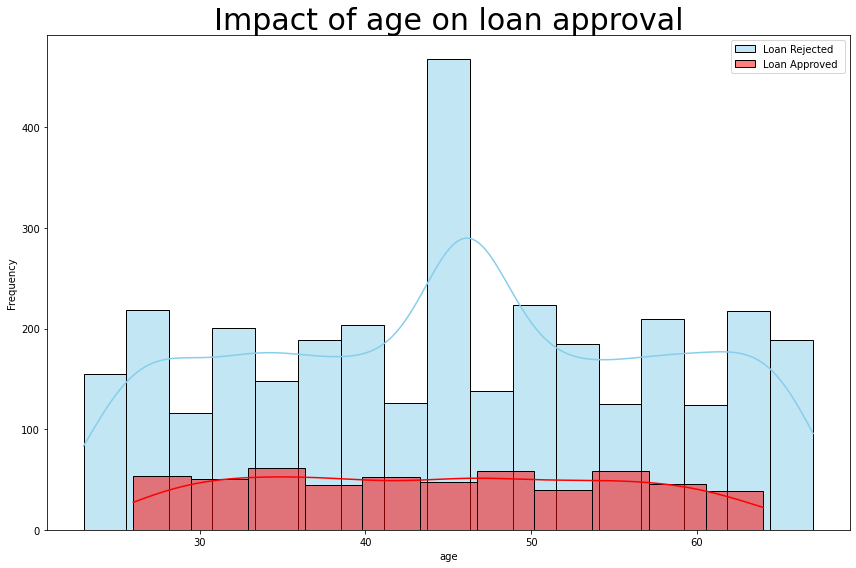

In [28]:
plt.figure(figsize=(12,8))

sns.histplot(data=unapprovedpersonal_loans_df, x="age",color="skyblue", label="Loan Rejected",kde=True)
sns.histplot(data=approvedpersonal_loans_df, x="age",color="red", label="Loan Approved ",kde=True)



plt.legend()
plt.title('Impact of age on loan approval', fontsize=30)
plt.xlabel("age")
plt.ylabel("Frequency")
#Saving Graph
plt.tight_layout() #automatically adjusts subplot to fit in the figure area
plt.savefig('ageloanapproval.png', dpi=300) # dpi-300 is print quality

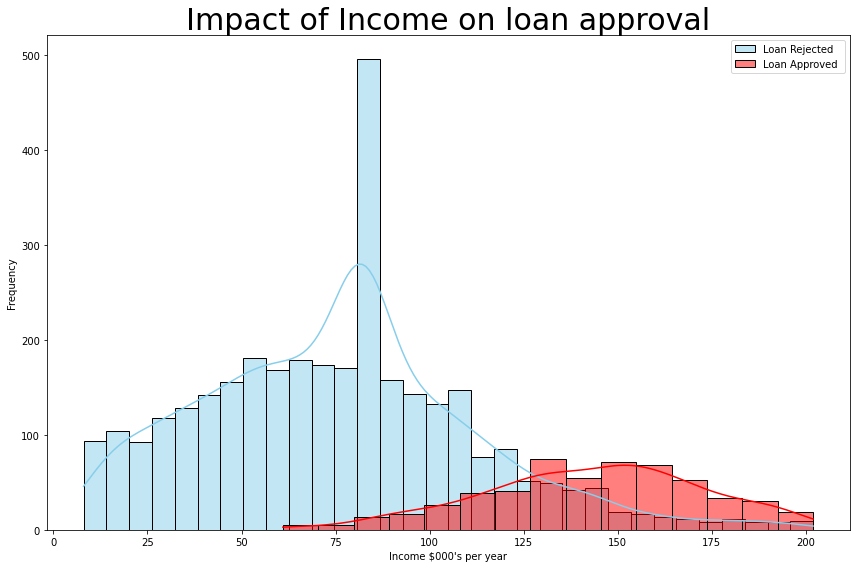

In [29]:
plt.figure(figsize=(12,8))

sns.histplot(data=unapprovedpersonal_loans_df, x="income",color="skyblue", label="Loan Rejected",kde=True)
sns.histplot(data=approvedpersonal_loans_df, x="income",color="red", label="Loan Approved ",kde=True)

plt.legend()
plt.title('Impact of Income on loan approval', fontsize=30)
plt.xlabel("Income $000's per year")
plt.ylabel("Frequency")

#Saving Graph
plt.tight_layout() #automatically adjusts subplot to fit in the figure area
plt.savefig('incomeloanapproval.png', dpi=300) # dpi-300 is print quality

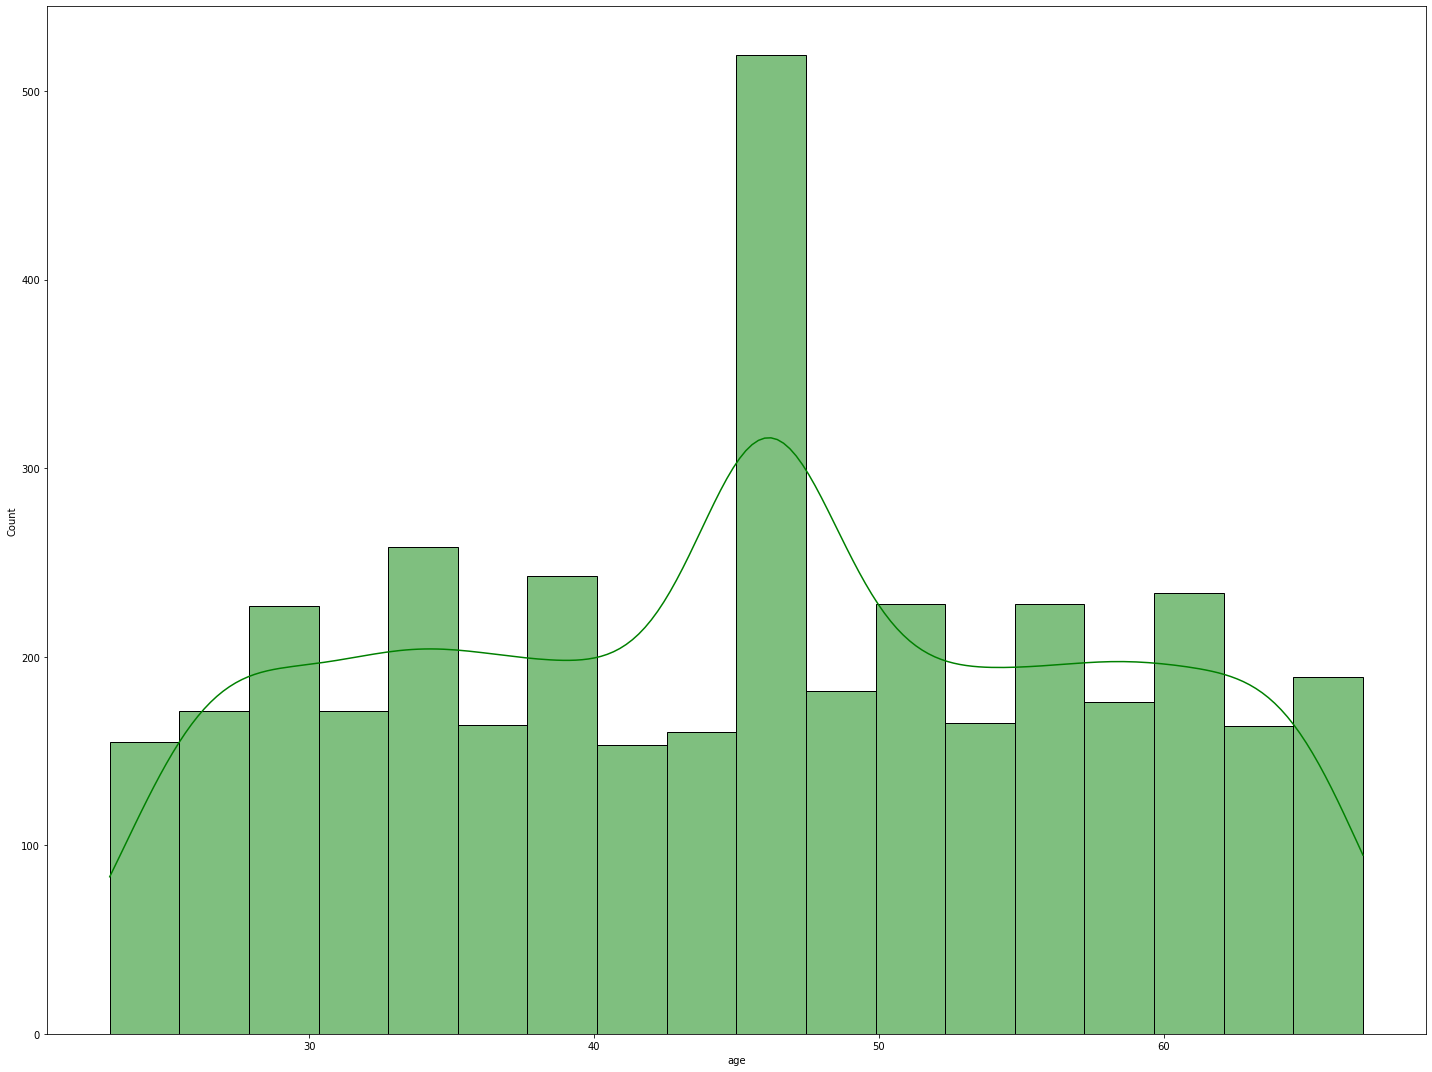

In [30]:
# Plot a histogram of a numerical variable
sns.histplot(data=personalLoan_df,x="age",color="green",kde=True)

plt.tight_layout()
plt.savefig('age-histogram.png',dpi=300)

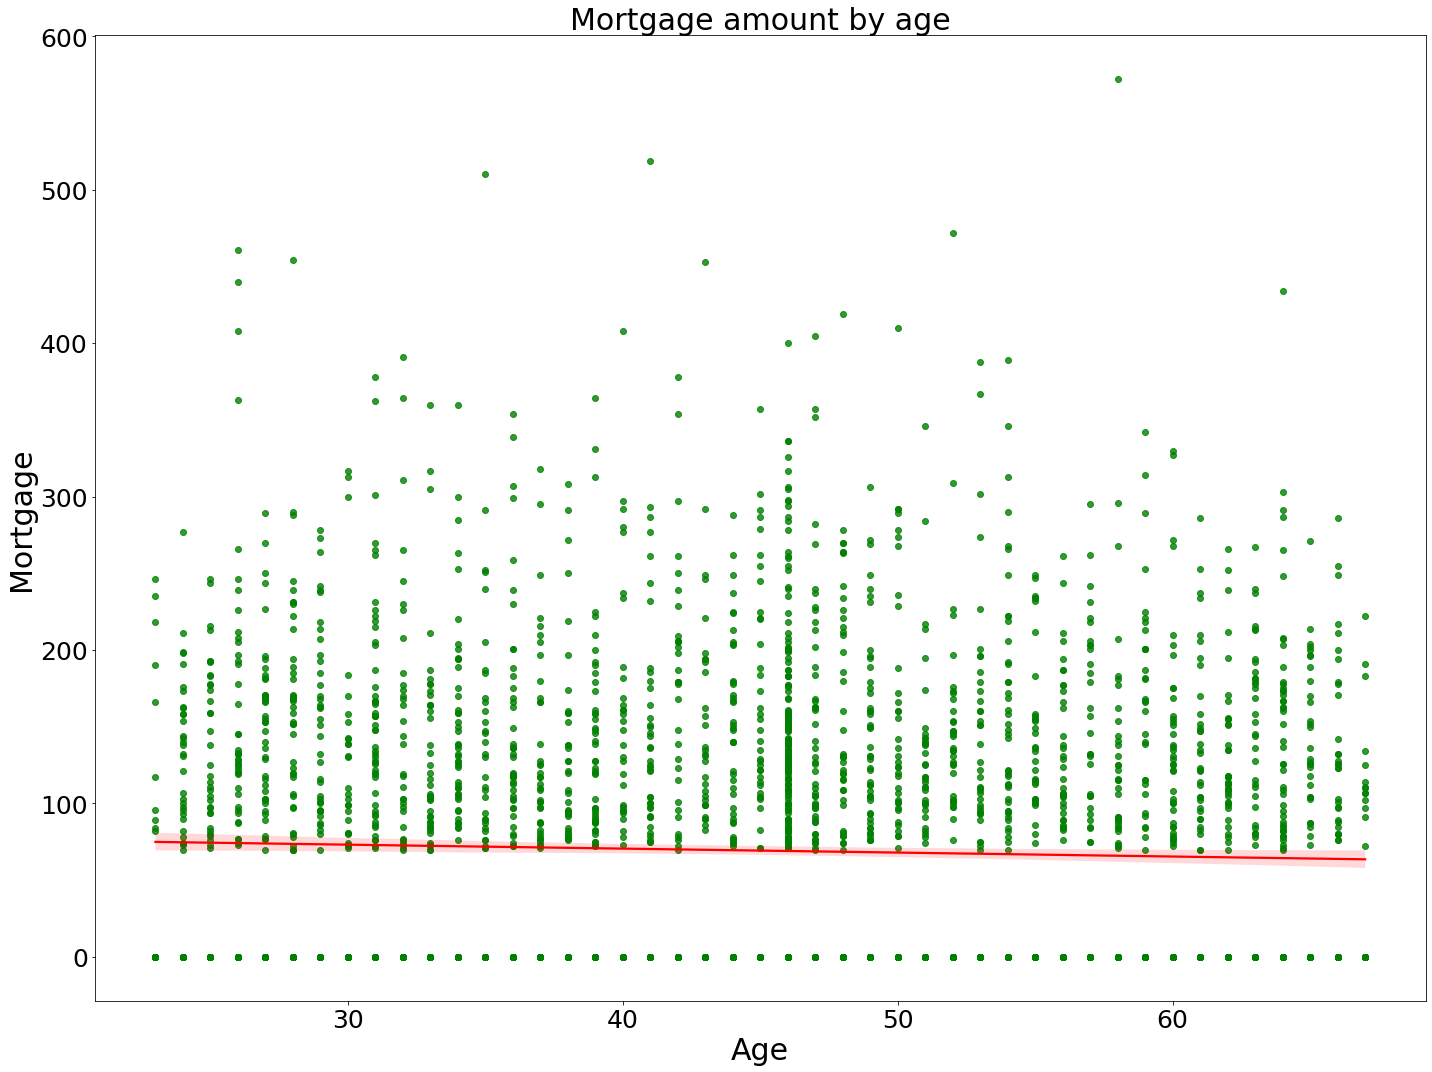

In [31]:
# Create a scatter plot of two numerical variables
sns.regplot(x="age",y="mortgage_amt",data=personalLoan_df,
           scatter_kws={"color":"green"},line_kws={"color":"red"})

plt.title('Mortgage amount by age', fontsize = 30)
plt.xlabel("Age",fontsize=30)
plt.ylabel("Mortgage",fontsize=30)
plt.tick_params(axis='both',which='both',labelsize=25)

plt.tight_layout()
plt.savefig('scatterplot-age-mortgage.png', dpi=300)

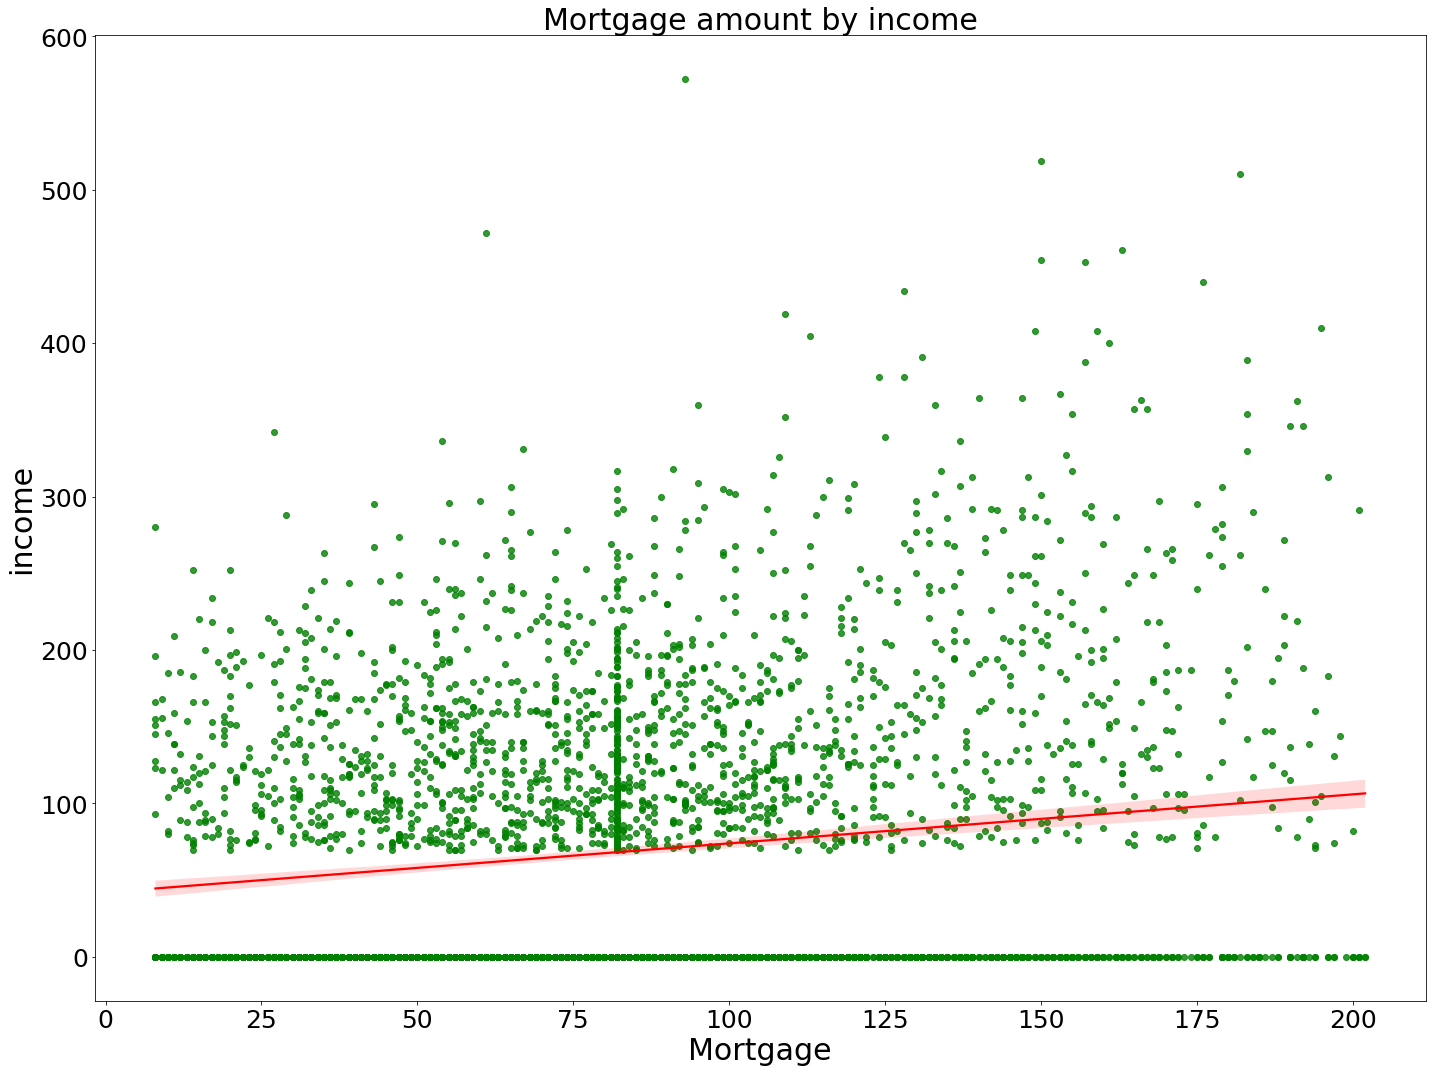

In [32]:
# Create a scatter plot of two numerical variables
sns.regplot(x="income",y="mortgage_amt",data=personalLoan_df,
           scatter_kws={"color":"green"},line_kws={"color":"red"})

plt.title('Mortgage amount by income', fontsize = 30)
plt.xlabel("Mortgage",fontsize=30)
plt.ylabel("income",fontsize=30)
plt.tick_params(axis='both',which='both',labelsize=25)

plt.tight_layout()
plt.savefig('scatterplot-income-mortgage.png', dpi=300)

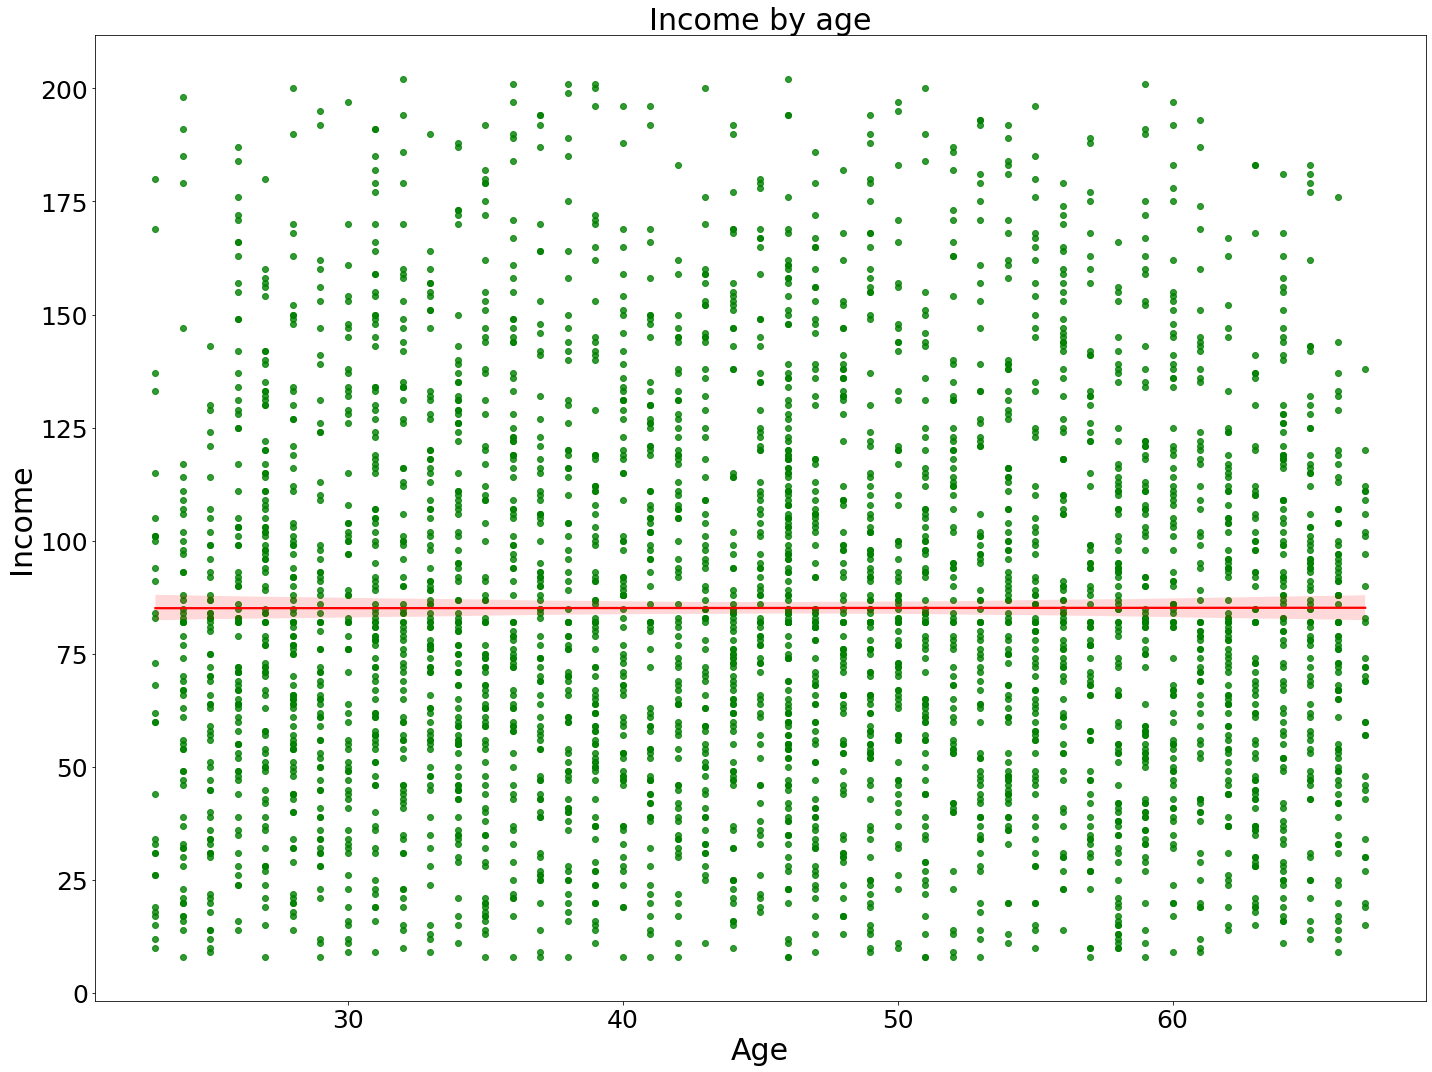

In [33]:
# Create a scatter plot of two numerical variables
sns.regplot(x="age",y="income",data=personalLoan_df,
           scatter_kws={"color":"green"},line_kws={"color":"red"})

plt.title('Income by age', fontsize = 30)
plt.xlabel("Age",fontsize=30)
plt.ylabel("Income",fontsize=30)
plt.tick_params(axis='both',which='both',labelsize=25)

plt.tight_layout()
plt.savefig('scatterplot-age-income.png', dpi=300)